In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashionMnist = tf.keras.datasets.fashion_mnist

In [4]:
(trainX, trainY), (testX, testY) = fashionMnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


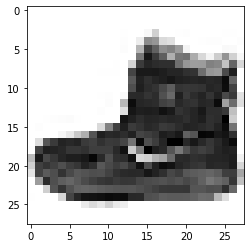

In [5]:
plt.imshow(trainX[0], cmap="Greys")

In [6]:
trainX = trainX/255
testX = testX/255

In [7]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

In [8]:
k = len(set(trainY))

In [9]:
i = Input(shape=trainX[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu') (i)
x = Conv2D(64, (3,3), strides=2, activation='relu') (i)
x = Conv2D(128, (3,3), strides=2, activation='relu') (i)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(k, activation='softmax')(x)
model = Model(i, x)

In [10]:
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#r = model.fit(trainX, trainY, validation_data=(testX,testY), epochs=15)

In [12]:
#model.save('Lector de ropa.model')
model.load_weights('Lector de ropa.model')

In [13]:
predictions = model.predict(testX)

In [14]:
import pandas as pd
url = r'https://github.com/zalandoresearch/fashion-mnist'
tables = pd.read_html(url)
labels = tables[2]

Predicted: Bag
Real: Bag


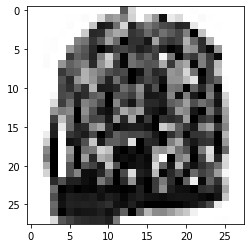

In [26]:
index = np.random.randint(0,10000)
prediction = np.argmax(predictions[index])
print('Predicted:', labels.loc[prediction].Description)
print('Real:', labels.loc[testY[index]]['Description'])
images = testX.reshape((10000,28,28))
plot = plt.imshow(images[index], cmap=plt.cm.binary)